In [13]:
import data
import models
import cache
import re
import pandas as pd
import seaborn as sns

In [3]:
model_name = 'model6.1'
by = 'cell_type'
sample_n = 100

In [4]:
sample_df = cache.cached(models.prep_sample_df, sample_n=sample_n)
(training_df, test_df) = models.split_sample_df(sample_df=sample_df, test_sample_n=1)

INFO:stancache.stancache:prep_sample_df: cache_filename set to prep_sample_df.cached.sample_n_100.pkl
INFO:stancache.stancache:prep_sample_df: Loading result from cache


In [5]:
model_file = models.get_model_file(model_name=model_name)
#print(cache._read_file(model_file))

In [6]:
stan_data = models.prep_stan_data(sample_df=training_df, test_df=test_df, by=by)

In [7]:
model_fit = models.cached_stan_fit(file=model_file, data=stan_data, model_name=model_name)

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to model6_1.cython_0_25_1.model_code_1025675002381806478.pystan_2_12_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Starting execution
INFO:pystan:COMPILING THE C++ CODE FOR MODEL model6_1_f189043aa81bce72d1c3f55bd293c2a8 NOW.
INFO:stancache.stancache:StanModel: Execution completed (0:01:30.457338 elapsed)
INFO:stancache.stancache:StanModel: Saving results to cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to model6_1.cython_0_25_1.model_code_1025675002381806478.pystan_2_12_0_0.stanfit.chains_4.data_84579507417.iter_2000.seed_1245502385.pkl
INFO:stancache.stancache:sampling: Starting execution
INFO:stancache.stancache:sampling: Execution completed (1:08:32.498351 elapsed)
INFO:stancache.stancache:sampling: Saving results to cache
/home/jacquelineburos/m

In [8]:
models.print_stan_summary(model_fit, pars='lp__')

              mean  se_mean         sd          2.5%           50%         97.5%      Rhat
lp__  4.208478e+07  5.92157  36.019505  4.208472e+07  4.208478e+07  4.208486e+07  1.075047


In [9]:
models.print_stan_summary(model_fit, pars='sample2_x')

                    mean   se_mean        sd      2.5%       50%     97.5%      Rhat
sample2_x[0,0]  0.733777  0.002250  0.114023  0.498398  0.741122  0.933307  1.000073
sample2_x[0,1]  0.042706  0.000658  0.041594  0.000952  0.029889  0.154730  0.999628
sample2_x[0,2]  0.223516  0.002325  0.116667  0.024700  0.218178  0.463666  0.999904


In [10]:
colnames = list(stan_data['x'].columns)
colnames

['cell_type[B]', 'cell_type[CD4]', 'cell_type[CD8]']

In [11]:
inferred_type = models.extract_theta_summary(colnames=colnames,
                                             par='sample2_x',
                                             stan_fit=model_fit, gene_id='sample_id')

In [14]:
df = pd.melt(inferred_type, id_vars=['iter','sample_id'], value_name='estimate', var_name='variable')
df['cell_type'] = df['variable'].apply(lambda x: re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2'))

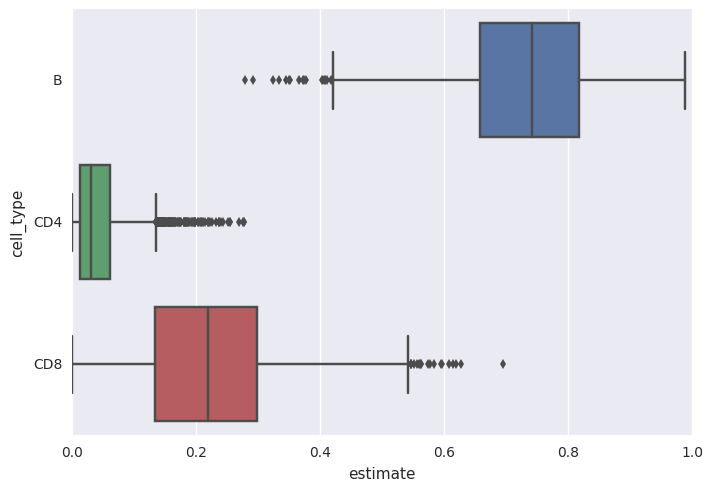

In [16]:
sns.boxplot(data=df, y='cell_type', x='estimate')

In [17]:
test_df['SubSet'].unique()

array(['B_Memory'], dtype=object)